# DV第4次作业 32019070233 张博强

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm, colors

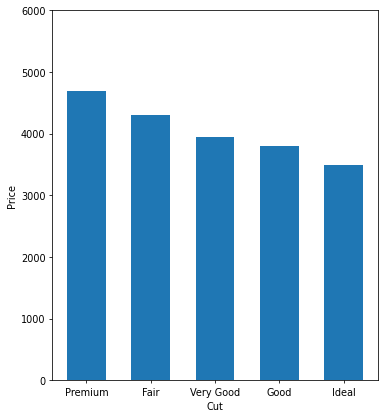

In [2]:
mydata = pd.DataFrame(
    {
        "Cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"],
        "Price": [4300, 3800, 3950, 4700, 3500],
    }
)
Sort_data = mydata.sort_values(by="Price", ascending=False)
plt.figure(figsize=(6, 7), dpi=70)
plt.bar(Sort_data["Cut"], Sort_data["Price"], width=0.6, align="center", label="Cut")
plt.ylim(0, 6000)
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

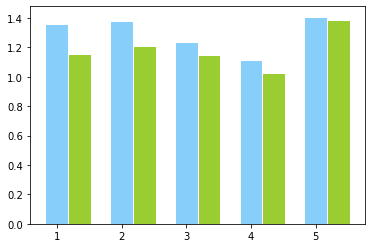

In [3]:
fig, ax = plt.subplots()
# plt.figure(figsize=(7, 5))
x = np.arange(1, 6)
Y1 = np.random.uniform(1.5, 1.0, 5)
Y2 = np.random.uniform(1.5, 1.0, 5)
plt.bar(x, Y1, width=0.35, facecolor="lightskyblue", edgecolor="white")
plt.bar(x + 0.35, Y2, width=0.35, facecolor="yellowgreen", edgecolor="white")
plt.show()

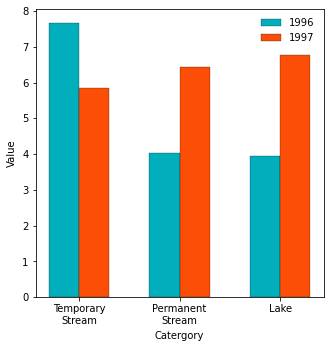

In [4]:
df = pd.read_csv("MultiColumn_Data.csv")
df = df.sort_values(by="1996", ascending=False)
x_label = np.array(df["Catergory"])
x = np.arange(len(x_label))
y1 = np.array(df["1996"])
y2 = np.array(df["1997"])
plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.bar(x, y1, width=0.3, color="#00AFBB", label="1996", edgecolor="k", linewidth=0.25)
plt.bar(
    x + 0.3, y2, width=0.3, color="#FC4E07", label="1997", edgecolor="k", linewidth=0.25
)
plt.xticks(x + 0.15, x_label, size=10)
plt.legend(loc="best", ncol=1, frameon=False)
plt.yticks(size=10)
plt.xlabel(
    "Catergory",
    labelpad=5,
    size=10,
)
plt.ylabel(
    "Value",
    labelpad=5,
    size=10,
)
plt.show()

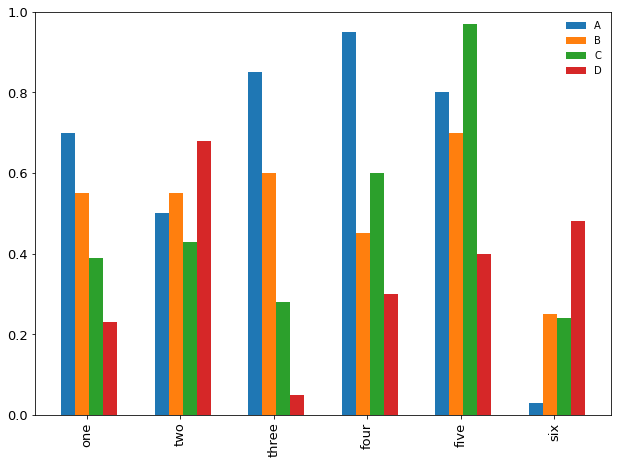

In [5]:
x_label = np.array(["one", "two", "three", "four", "five", "six"])
x = np.arange(len(x_label))
y1 = np.array([0.7, 0.5, 0.85, 0.95, 0.8, 0.03])
y2 = np.array([0.55, 0.55, 0.6, 0.45, 0.7, 0.25])
y3 = np.array([0.39, 0.43, 0.28, 0.6, 0.97, 0.24])
y4 = np.array([0.23, 0.68, 0.05, 0.3, 0.4, 0.48])
plt.figure(figsize=(10, 7))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.bar(x, y1, width=0.15, color="#1f77b4", label="A", edgecolor="k", linewidth=0)
plt.bar(
    x + 0.15, y2, width=0.15, color="#ff7f0e", label="B", edgecolor="k", linewidth=0
)
plt.bar(x + 0.3, y3, width=0.15, color="#2ca02c", label="C", edgecolor="k", linewidth=0)
plt.bar(
    x + 0.45, y4, width=0.15, color="#d62728", label="D", edgecolor="k", linewidth=0
)
plt.xticks(x + 0.2, x_label, size=13, rotation=90)
plt.legend(loc="best", ncol=1, frameon=False)
plt.yticks(size=13)
plt.ylim(0, 1)
plt.show()

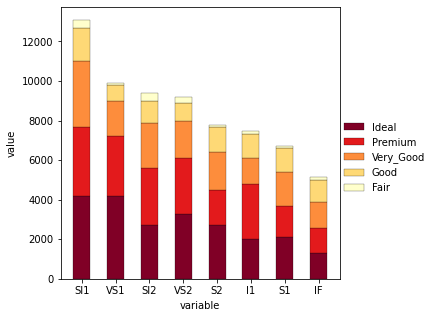

In [6]:
df = pd.read_csv("StackedColumn_Data.csv")
df = df.set_index("Clarity")
Sum_df = df.apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)
df = df.loc[:, Sum_df.index]
meanRow_df = df.apply(lambda x: x.mean(), axis=1)
Sing_df = meanRow_df.sort_values(ascending=False).index
n_row, n_col = df.shape
# x_label = np.array(df.columns)
x_value = np.arange(n_col)
cmap = cm.get_cmap("YlOrRd_r", n_row)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
bottom_y = np.zeros(n_col)

plt.figure(figsize=(5, 5))

for i in range(n_row):
    label = Sing_df[i]
    plt.bar(
        x_value,
        df.loc[
            label,
        ],
        bottom=bottom_y,
        width=0.5,
        color=color[i],
        label=label,
        edgecolor="k",
        linewidth=0.25,
    )
    bottom_y = bottom_y + df.loc[label, :].values

plt.xticks(x_value, df.columns, size=10)
plt.legend(loc="best", ncol=1, frameon=False)
plt.legend(loc=(1, 0.3), ncol=1, frameon=False)
plt.xlabel(
    "variable",
    labelpad=5,
    size=10,
)
plt.ylabel(
    "value",
    labelpad=5,
    size=10,
)
plt.show()

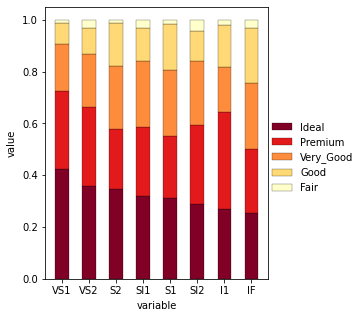

In [7]:
df = pd.read_csv("StackedColumn_Data.csv")
df = df.set_index("Clarity")
SumCol_df = df.apply(lambda x: x.sum(), axis=0)
df = df.apply(lambda x: x / SumCol_df, axis=1)
meanRow_df = df.apply(lambda x: x.mean(), axis=1)
Per_df = df.loc[meanRow_df.idxmax(), :].sort_values(ascending=False)
Sing_df = meanRow_df.sort_values(ascending=False).index
df = df.loc[:, Per_df.index]
n_row, n_col = df.shape
x_value = np.arange(n_col)
cmap = cm.get_cmap("YlOrRd_r", n_row)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
bottom_y = np.zeros(n_col)

fig = plt.figure(figsize=(4, 5))

for i in range(n_row):
    label = Sing_df[i]
    plt.bar(
        x_value,
        df.loc[label, :],
        bottom=bottom_y,
        width=0.5,
        color=color[i],
        label=label,
        edgecolor="k",
        linewidth=0.25,
    )
    bottom_y = bottom_y + df.loc[label, :].values
plt.xticks(x_value, df.columns, size=10)

plt.legend(loc=(1, 0.3), ncol=1, frameon=False)

plt.xlabel(
    "variable",
    labelpad=5,
    size=10,
)

plt.ylabel(
    "value",
    labelpad=5,
    size=10,
)
plt.show()